<a href="https://colab.research.google.com/github/sarathsreedharan/CSU_CS_445/blob/main/Spring25/Notebooks/module01_02_linear_regression_with_fixed_non_linear_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Linear Regression with Fixed Nonlinear Features

The models we have been buildling are linear in the parameters $\wv$
and linear in the attributes (features) of the samples. These models generally take the form.  

$$
   g(\xv;\wv) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D
$$


Can I use this basic function for a line or more generally a hyperplane, to generate a non-linear function??


What if instead of passing original datapoints, we passed non-linear transformation of the input data? For example,

$$
   g(\xv;\wv) = w_0 + w_1 x_1^2
$$


We can make
models that are nonlinear in the attributes by adding nonlinear
functions of the original features.  

Say we have a single feature for each sample.  Our data matrix is
$$
\begin{alignat*}{1}
 X &= \begin{bmatrix}
       x_0\\
       x_1\\
       \vdots \\
       x_N
       \end{bmatrix}
\end{alignat*}
$$
We can add other powers of each $x$ value, say up to the fourth power.
$$
\begin{alignat*}{1}
 X &= \begin{bmatrix}
       x_0 & x_0^2 & x_0^3 & x_0^4\\
       x_1 & x_1^2 & x_1^3 & x_1^4\\
       \vdots \\
       x_N & x_N^2 & x_N^3 & x_N^4\\
       \end{bmatrix}
\end{alignat*}
$$

This is simple to do in python.

    X = np.hstack((X, X**2, X**3, X**4))

Which of these powers of $x$ are useful?  Looking at the magnitudes of the weights is helpful, as long as the input features are
standardized.  We can do more than this, though.  If we build multiple models from multiple "bootstrap samples" of the training data, we can compute confidence intervals of the weight values.

* If zero is not included in the range of weight values specified by a weight's 90% lower and upper confidence limit, then we can say that we are 90% certain that the value of this weight is not zero.
* If the range does include zero, the corresponding feature is probably one that is not useful.

**What's a boostrap sample?**

A *bootstrap sample* is a smaller sample that is **bootstrapped** from a larger sample. Bootstrapping is a type of resampling where large numbers of smaller samples of the same size are repeatedly drawn, with replacement, from a single original sample.

Decent explainer here: https://www.statisticshowto.com/bootstrap-sample/

Here is some code that illustrates this process.  We include a value $\lambda$, which is a penalty on weight magnitudes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# set backend of matplotlib to the 'inline' backend
# print plots inline into notebook
%matplotlib inline

In [2]:
import random

In [3]:
def train(X, T, lamb=0):
    means = X.mean(0)
    stds = X.std(0)
    n, d = X.shape
    Xs1 = np.insert((X - means)/stds, 0, 1, axis=1)
    lambDiag = np.eye(d+1) * lamb
    lambDiag[0, 0] = 0
    w = np.linalg.lstsq( Xs1.T @ Xs1 + lambDiag, Xs1.T @ T, rcond=None)[0]
    return {'w': w, 'means':means, 'stds':stds, 'lambda': lamb}

def use(model, X):
    Xs1 = np.insert((X - model['means'])/model['stds'], 0, 1, axis=1)
    return Xs1 @ model['w']

def rmse(A,B):
    return np.sqrt(np.mean( (A - B)**2 ))


In [4]:
# "eye" = "i" = "identity"
np.eye?

Now, make a simple function of $x$. How about $f(x) = -1 + 0.1 x^2 - 0.02 x^3 + 0.5 n$, where $n$ is from a standard Normal distribution.

In [6]:
nSamples = 40
trainingFraction = 0.5

X = np.hstack((np.linspace(0, 3, num=nSamples),
               np.linspace(6, 10, num=nSamples))).reshape((2*nSamples, 1))
# T = -1 + 1 * X + 2 * np.sin(X*2) + 0.55*np.random.normal(size=(2*nSamples,1))
T = -1 + 0 * X + 0.1 * X**2 - 0.02 * X**3 + 0.5*np.random.normal(size=(2*nSamples, 1))
X.shape, T.shape

((80, 1), (80, 1))

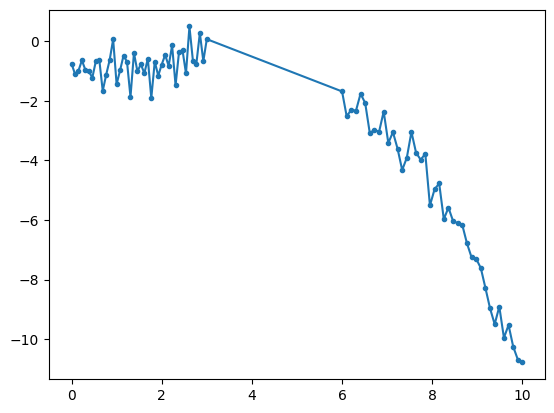

In [7]:
plt.plot(X, T, '.-');

Let's add squared and cubed values of each feature.

In [8]:
Xf = np.hstack((X, X**2, X**3, X**4, X**5))
#Xf = np.hstack((X, np.sin(X)))

Divide data into training and testing sets, randomly.

In [9]:
nRows = Xf.shape[0]
nRows

80

In [10]:
rowIndices = np.arange(nRows)
np.random.shuffle(rowIndices)
rowIndices

array([60, 55, 52, 27, 61, 39, 18, 36, 20, 22, 79, 66, 45, 75,  2, 24, 29,
       46, 64, 38, 48,  8, 51, 65, 67,  3, 78, 44, 31, 13, 11, 12, 58, 49,
        5, 71, 10, 47, 62, 23, 54, 21, 40, 26,  1,  7, 53, 56, 42, 59, 37,
       77, 33,  9, 30, 74, 72, 41,  4, 69, 19,  6, 63, 16, 25, 15, 50, 17,
       73, 14, 28, 68, 57, 32, 35, 43,  0, 76, 34, 70])

In [11]:
# round -> round(7.8) = 8
nTrain = round(nRows * trainingFraction)
nTest = nRows - nTrain
trainIndices = rowIndices[:nTrain]
testIndices = rowIndices[nTrain:]

Xtrain = Xf[trainIndices, :]
Ttrain = T[trainIndices, :]
Xtest = Xf[testIndices, :]
Ttest = T[testIndices, :]

Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((40, 5), (40, 1), (40, 5), (40, 1))

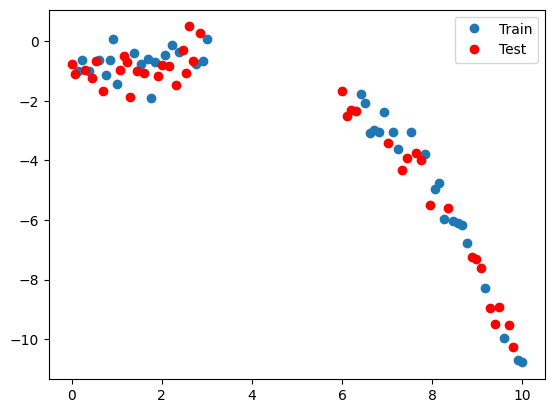

In [14]:
plt.plot(Xtrain[:, 0], Ttrain, 'o', label='Train')
plt.plot(Xtest[:, 0], Ttest, 'ro', label='Test')
plt.legend(loc='best');

Make models based on bootstrap samples of training data.  `models` will be list of models, one for each bootstrap sample.

In [15]:
[random.randint(0,10) for i in range(20)]

[4, 9, 1, 7, 0, 1, 4, 4, 3, 3, 1, 4, 4, 5, 7, 5, 2, 10, 0, 0]

In [16]:
nModels = 100
lambdaw = 0
models = []
for modeli in range(nModels):
    # Draw random sample (row) numbers, with repetition
    trainI = [random.randint(0, nTrain-1) for i in range(nTrain)]
    XtrainBoot = Xtrain[trainI, :]
    TtrainBoot = Ttrain[trainI, :]
    model = train(XtrainBoot, TtrainBoot, lambdaw)
    models.append(model)

In [17]:
len(models)

100

In [20]:
models[0]

{'w': array([[ -2.38089097],
        [  2.30702911],
        [-14.5844768 ],
        [ 38.04657797],
        [-44.62103628],
        [ 16.20841417]]),
 'means': array([4.09294872e+00, 2.76683925e+01, 2.15217297e+02, 1.76624373e+03,
        1.49444967e+04]),
 'stds': array([3.30396176e+00, 3.16339025e+01, 2.88184295e+02, 2.66805016e+03,
        2.51822379e+04]),
 'lambda': 0}

Now we will apply all of the models to the test data.

In [21]:
YAll = [] # pronounced "why all"
for model in models:
    YAll.append( use(model, Xtest) )

In [22]:
np.array(YAll).shape

(100, 40, 1)

In [23]:
np.array(YAll).squeeze().shape

(100, 40)

In [24]:
YAll = np.array(YAll).squeeze().T
Ytest = np.mean(YAll, axis=1)

In [25]:
Ytest.shape

(40,)

In [26]:
RMSEtest = np.sqrt(np.mean((Ytest - Ttest)**2))
print('Test RMSE is {:.4f}'.format(RMSEtest))

Test RMSE is 4.4250


Now let's look at some of the methods we're going to put to use next.

* `np.linspace(a,b,n)` returns *n* evenly spaced numbers over an interval from *a* to *b*.
* `np.reshape((dim))` gives a new dimensionality *dim* to an array without changing its data

In [27]:
np.linspace?

In [40]:
nPlot = 100
print(nPlot)
evenDistrib = np.linspace(0,12.5,nPlot)
evenDistrib

100


array([ 0.        ,  0.12626263,  0.25252525,  0.37878788,  0.50505051,
        0.63131313,  0.75757576,  0.88383838,  1.01010101,  1.13636364,
        1.26262626,  1.38888889,  1.51515152,  1.64141414,  1.76767677,
        1.89393939,  2.02020202,  2.14646465,  2.27272727,  2.3989899 ,
        2.52525253,  2.65151515,  2.77777778,  2.9040404 ,  3.03030303,
        3.15656566,  3.28282828,  3.40909091,  3.53535354,  3.66161616,
        3.78787879,  3.91414141,  4.04040404,  4.16666667,  4.29292929,
        4.41919192,  4.54545455,  4.67171717,  4.7979798 ,  4.92424242,
        5.05050505,  5.17676768,  5.3030303 ,  5.42929293,  5.55555556,
        5.68181818,  5.80808081,  5.93434343,  6.06060606,  6.18686869,
        6.31313131,  6.43939394,  6.56565657,  6.69191919,  6.81818182,
        6.94444444,  7.07070707,  7.1969697 ,  7.32323232,  7.44949495,
        7.57575758,  7.7020202 ,  7.82828283,  7.95454545,  8.08080808,
        8.20707071,  8.33333333,  8.45959596,  8.58585859,  8.71

In [29]:
np.reshape?

In [30]:
evenDistrib.shape

(100,)

In [31]:
evenDistrib = evenDistrib.reshape((nPlot,1))
evenDistrib

array([[ 0.        ],
       [ 0.12626263],
       [ 0.25252525],
       [ 0.37878788],
       [ 0.50505051],
       [ 0.63131313],
       [ 0.75757576],
       [ 0.88383838],
       [ 1.01010101],
       [ 1.13636364],
       [ 1.26262626],
       [ 1.38888889],
       [ 1.51515152],
       [ 1.64141414],
       [ 1.76767677],
       [ 1.89393939],
       [ 2.02020202],
       [ 2.14646465],
       [ 2.27272727],
       [ 2.3989899 ],
       [ 2.52525253],
       [ 2.65151515],
       [ 2.77777778],
       [ 2.9040404 ],
       [ 3.03030303],
       [ 3.15656566],
       [ 3.28282828],
       [ 3.40909091],
       [ 3.53535354],
       [ 3.66161616],
       [ 3.78787879],
       [ 3.91414141],
       [ 4.04040404],
       [ 4.16666667],
       [ 4.29292929],
       [ 4.41919192],
       [ 4.54545455],
       [ 4.67171717],
       [ 4.7979798 ],
       [ 4.92424242],
       [ 5.05050505],
       [ 5.17676768],
       [ 5.3030303 ],
       [ 5.42929293],
       [ 5.55555556],
       [ 5

In [32]:
evenDistrib.shape

(100, 1)

In [33]:
# the new shape must be compatible with the old shape
evenDistrib.reshape((50,2))

array([[ 0.        ,  0.12626263],
       [ 0.25252525,  0.37878788],
       [ 0.50505051,  0.63131313],
       [ 0.75757576,  0.88383838],
       [ 1.01010101,  1.13636364],
       [ 1.26262626,  1.38888889],
       [ 1.51515152,  1.64141414],
       [ 1.76767677,  1.89393939],
       [ 2.02020202,  2.14646465],
       [ 2.27272727,  2.3989899 ],
       [ 2.52525253,  2.65151515],
       [ 2.77777778,  2.9040404 ],
       [ 3.03030303,  3.15656566],
       [ 3.28282828,  3.40909091],
       [ 3.53535354,  3.66161616],
       [ 3.78787879,  3.91414141],
       [ 4.04040404,  4.16666667],
       [ 4.29292929,  4.41919192],
       [ 4.54545455,  4.67171717],
       [ 4.7979798 ,  4.92424242],
       [ 5.05050505,  5.17676768],
       [ 5.3030303 ,  5.42929293],
       [ 5.55555556,  5.68181818],
       [ 5.80808081,  5.93434343],
       [ 6.06060606,  6.18686869],
       [ 6.31313131,  6.43939394],
       [ 6.56565657,  6.69191919],
       [ 6.81818182,  6.94444444],
       [ 7.07070707,

In [34]:
evenDistrib.reshape((25,2,1,2)) # even this would work

array([[[[ 0.        ,  0.12626263]],

        [[ 0.25252525,  0.37878788]]],


       [[[ 0.50505051,  0.63131313]],

        [[ 0.75757576,  0.88383838]]],


       [[[ 1.01010101,  1.13636364]],

        [[ 1.26262626,  1.38888889]]],


       [[[ 1.51515152,  1.64141414]],

        [[ 1.76767677,  1.89393939]]],


       [[[ 2.02020202,  2.14646465]],

        [[ 2.27272727,  2.3989899 ]]],


       [[[ 2.52525253,  2.65151515]],

        [[ 2.77777778,  2.9040404 ]]],


       [[[ 3.03030303,  3.15656566]],

        [[ 3.28282828,  3.40909091]]],


       [[[ 3.53535354,  3.66161616]],

        [[ 3.78787879,  3.91414141]]],


       [[[ 4.04040404,  4.16666667]],

        [[ 4.29292929,  4.41919192]]],


       [[[ 4.54545455,  4.67171717]],

        [[ 4.7979798 ,  4.92424242]]],


       [[[ 5.05050505,  5.17676768]],

        [[ 5.3030303 ,  5.42929293]]],


       [[[ 5.55555556,  5.68181818]],

        [[ 5.80808081,  5.93434343]]],


       [[[ 6.06060606,  6.18686869]],

 

In [35]:
evenDistrib.reshape((101,1)) # this does not work

ValueError: cannot reshape array of size 100 into shape (101,1)

In [36]:
nPlot = 100
Xplot = np.linspace(0, 12.5, nPlot).reshape((nPlot ,1)) # <-- np.linspace and np.reshape
# for each value ("feature") in Xplot, square it, cube it, etc.
Xplotf = np.hstack((Xplot, Xplot**2, Xplot**3, Xplot**4, Xplot**5))
Xplotf

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.26262626e-01, 1.59422508e-02, 2.01291045e-03, 2.54155360e-04,
        3.20903233e-05],
       [2.52525253e-01, 6.37690032e-02, 1.61032836e-02, 4.06648576e-03,
        1.02689034e-03],
       [3.78787879e-01, 1.43480257e-01, 5.43485822e-02, 2.05865842e-02,
        7.79794855e-03],
       [5.05050505e-01, 2.55076013e-01, 1.28826269e-01, 6.50637722e-02,
        3.28604910e-02],
       [6.31313131e-01, 3.98556270e-01, 2.51613807e-01, 1.58847100e-01,
        1.00282260e-01],
       [7.57575758e-01, 5.73921028e-01, 4.34788658e-01, 3.29385347e-01,
        2.49534354e-01],
       [8.83838384e-01, 7.81170289e-01, 6.90428286e-01, 6.10227020e-01,
        5.39342063e-01],
       [1.01010101e+00, 1.02030405e+00, 1.03061015e+00, 1.04102036e+00,
        1.05153571e+00],
       [1.13636364e+00, 1.29132231e+00, 1.46741172e+00, 1.66751332e+00,
        1.89490150e+00],
       [1.26262626e+00, 1.5942

In [44]:
Ys = []
for model in models:
    Yplot = use(model, Xplotf) # evaluate method
    Ys.append(Yplot.flatten())
Ys = np.array(Ys).T
Ys.shape

(100, 100)

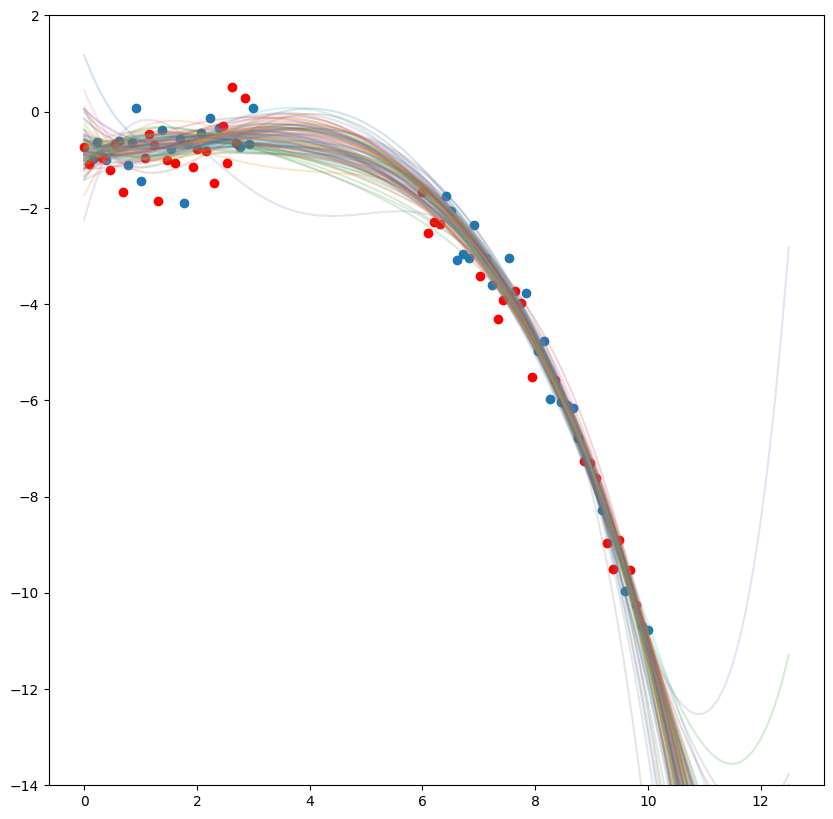

In [45]:
plt.figure(figsize=(10, 10))
plt.plot(Xtrain[:, 0], Ttrain, 'o')
plt.plot(Xtest[:, 0], Ttest, 'ro')
plt.plot(Xplotf[:, 0], Ys, alpha=0.2);
plt.ylim(-14,2);

Now let's try some other data.  Here is some data related to the design of hulls on yachts.

In [46]:
!curl -O https://archive.ics.uci.edu/ml/machine-learning-databases/00243/yacht_hydrodynamics.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11487    0 11487    0     0  13848      0 --:--:-- --:--:-- --:--:-- 13839


In [47]:
# use with *nix
!head yacht_hydrodynamics.data

-2.3 0.568 4.78 3.99 3.17 0.125 0.11
-2.3 0.568 4.78 3.99 3.17 0.150 0.27
-2.3 0.568 4.78 3.99 3.17 0.175 0.47
-2.3 0.568 4.78 3.99 3.17 0.200 0.78
-2.3 0.568 4.78 3.99 3.17 0.225 1.18
-2.3 0.568 4.78 3.99 3.17 0.250 1.82
-2.3 0.568 4.78 3.99 3.17 0.275 2.61
-2.3 0.568 4.78 3.99 3.17 0.300 3.76
-2.3 0.568 4.78 3.99 3.17 0.325 4.99
-2.3 0.568 4.78 3.99 3.17 0.350 7.16


In [ ]:
# use with Windows
!more yacht_hydrodynamics.data +0

-2.3 0.568 4.78 3.99 3.17 0.125 0.11
-2.3 0.568 4.78 3.99 3.17 0.150 0.27
-2.3 0.568 4.78 3.99 3.17 0.175 0.47
-2.3 0.568 4.78 3.99 3.17 0.200 0.78
-2.3 0.568 4.78 3.99 3.17 0.225 1.18
-2.3 0.568 4.78 3.99 3.17 0.250 1.82
-2.3 0.568 4.78 3.99 3.17 0.275 2.61
-2.3 0.568 4.78 3.99 3.17 0.300 3.76
-2.3 0.568 4.78 3.99 3.17 0.325 4.99
-2.3 0.568 4.78 3.99 3.17 0.350 7.16
-2.3 0.568 4.78 3.99 3.17 0.375 11.93
-2.3 0.568 4.78 3.99 3.17 0.400 20.11
-2.3 0.568 4.78 3.99 3.17 0.425 32.75
-2.3 0.568 4.78 3.99 3.17 0.450 49.49
-2.3 0.569 4.78 3.04 3.64 0.125 0.04
-2.3 0.569 4.78 3.04 3.64 0.150 0.17
-2.3 0.569 4.78 3.04 3.64 0.175 0.37
-2.3 0.569 4.78 3.04 3.64 0.200 0.66
-2.3 0.569 4.78 3.04 3.64 0.225 1.06
-2.3 0.569 4.78 3.04 3.64 0.250 1.59
-2.3 0.569 4.78 3.04 3.64 0.275 2.33
-2.3 0.569 4.78 3.04 3.64 0.300 3.29
-2.3 0.569 4.78 3.04 3.64 0.325 4.61
-2.3 0.569 4.78 3.04 3.64 0.350 7.11
-2.3 0.569 4.78 3.04 3.64 0.375 11.99
-2.3 0.569 4.78 3.04 3.64 0.400 21.09
-2.3 0.569 4.78 3.04 3.64 0.425 

In [48]:
data = np.loadtxt('yacht_hydrodynamics.data')

# target values are the last column
T = data[:, -1:]
# everything else is (potential) explanatory variables
X = data[:, :-1]
Xnames = ['Center of Buoyancy', 'Prismatic coefficient', 'Length-displacement ratio', 'Beam-draught ratio',
          'Length-beam ratio', 'Froude number']
Tname = 'Resistance'
X.shape, T.shape, Xnames, Tname

((308, 6),
 (308, 1),
 ['Center of Buoyancy',
  'Prismatic coefficient',
  'Length-displacement ratio',
  'Beam-draught ratio',
  'Length-beam ratio',
  'Froude number'],
 'Resistance')

In [49]:
# it would be neater to view it in chart form
import pandas
df = pandas.read_csv('yacht_hydrodynamics.data', header=None, delim_whitespace=True, na_values='?')
df.columns = Xnames+[Tname]
df

<ipython-input-49-bad8523b4cdf>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pandas.read_csv('yacht_hydrodynamics.data', header=None, delim_whitespace=True, na_values='?')


,Center of Buoyancy,Prismatic coefficient,Length-displacement ratio,Beam-draught ratio,Length-beam ratio,Froude number,Resistance
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
...,...,...,...,...,...,...,...
303,-2.3,0.600,4.34,4.23,2.73,0.350,8.47
304,-2.3,0.600,4.34,4.23,2.73,0.375,12.27
305,-2.3,0.600,4.34,4.23,2.73,0.400,19.59
306,-2.3,0.600,4.34,4.23,2.73,0.425,30.48


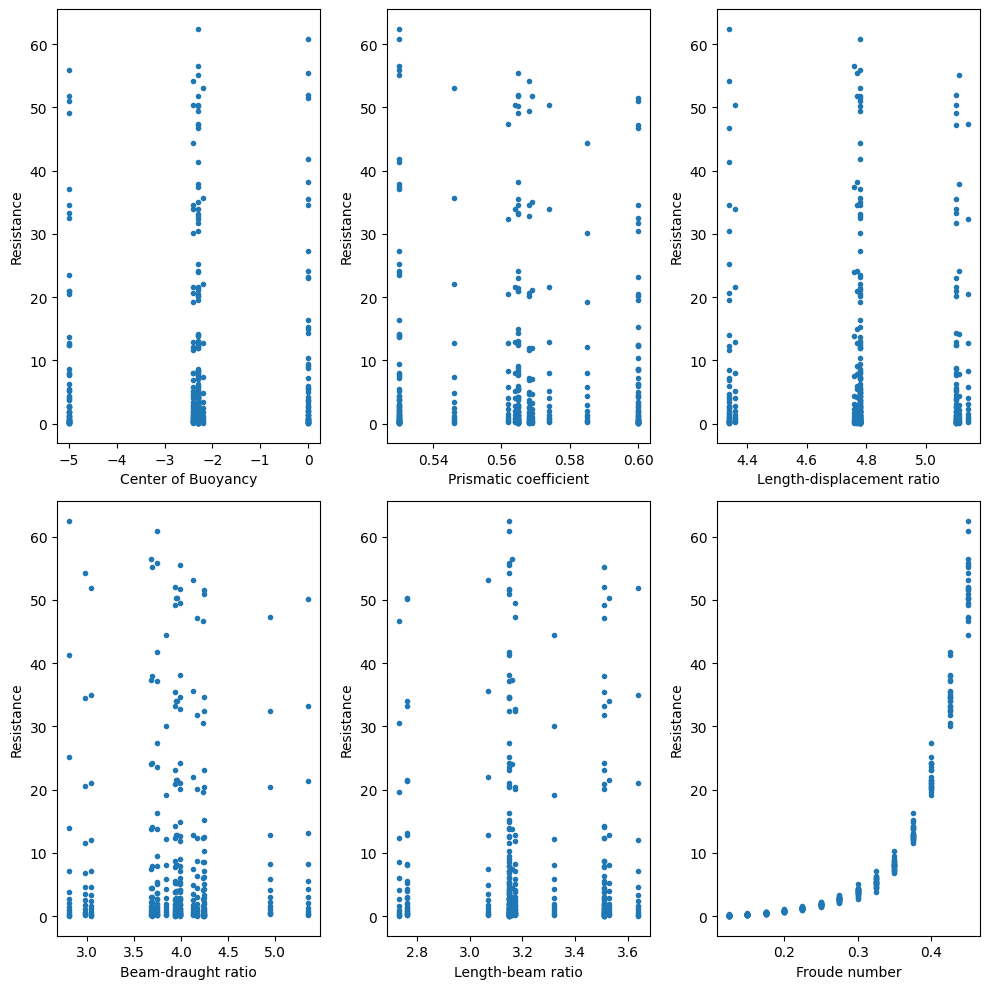

In [50]:
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.plot(X[:, i] ,T, '.')
    plt.ylabel(Tname)
    plt.xlabel(Xnames[i])
plt.tight_layout()

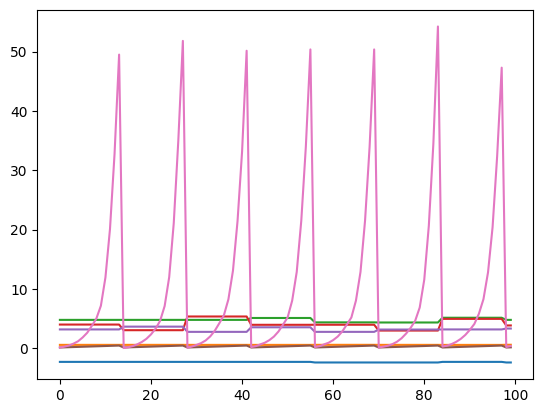

In [53]:
plt.plot(X[:100, :])
plt.plot(T[:100, :])

In [54]:
# now, let's train a model to predict T from X
model = train(X, T)
predict = use(model, X)
print("RSME =",rmse(predict, T))

RSME = 8.857208839069159


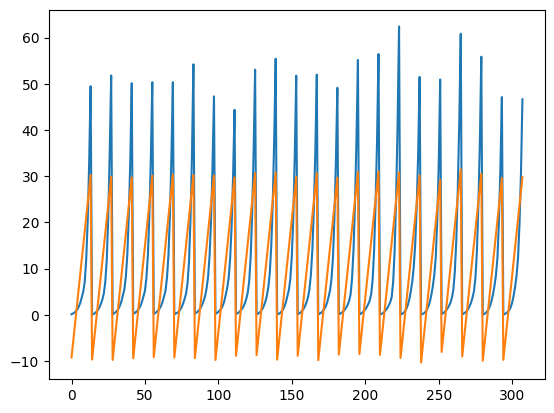

In [55]:
plt.plot(T)
plt.plot(predict)

Text(0, 0.5, 'predicted')

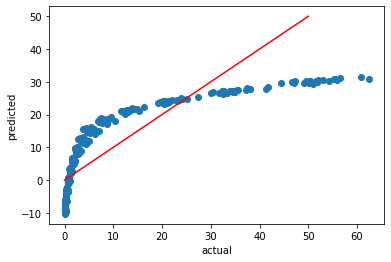

In [ ]:
# now plot our predictions vs. actual values (T)
# remember, pyplot.plot takes the X axis values first, which here are the actual values
plt.plot(T, predict, 'o')
plt.plot([0, 50], [0, 50],  'r-') # y = x for reference
plt.xlabel('actual')
plt.ylabel('predicted')

Humm...that last variable, the Froude number, looks like its square root might be more linearly related to resistance.

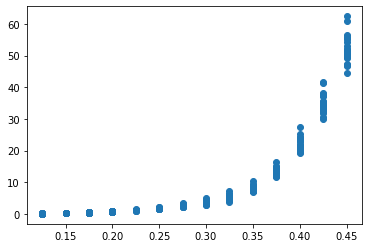

In [ ]:
plt.plot(X[:,-1], T, 'o') # plot resistance vs. Froude number

Steep non-linear curve!

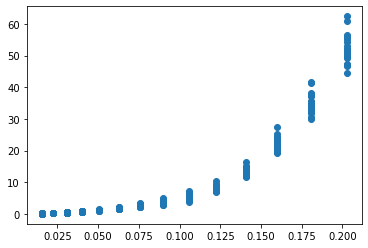

In [ ]:
plt.plot(X[:,-1]**2, T, 'o')

Getting shallower...

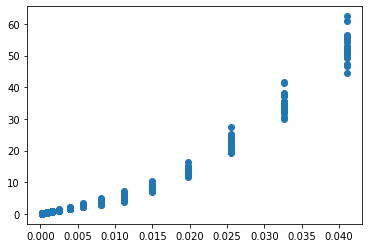

In [ ]:
plt.plot(X[:,-1]**4, T, 'o')

Almost but not quite...

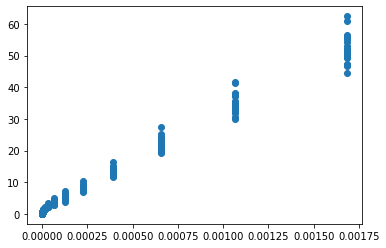

In [ ]:
plt.plot(X[:,-1]**8, T, 'o')

This looks linear-ish.  Let's try it.

In [ ]:
Xf = np.hstack([X, X[:,-1:]**8])
Xf

array([[-2.30000000e+00,  5.68000000e-01,  4.78000000e+00, ...,
         3.17000000e+00,  1.25000000e-01,  5.96046448e-08],
       [-2.30000000e+00,  5.68000000e-01,  4.78000000e+00, ...,
         3.17000000e+00,  1.50000000e-01,  2.56289062e-07],
       [-2.30000000e+00,  5.68000000e-01,  4.78000000e+00, ...,
         3.17000000e+00,  1.75000000e-01,  8.79638824e-07],
       ...,
       [-2.30000000e+00,  6.00000000e-01,  4.34000000e+00, ...,
         2.73000000e+00,  4.00000000e-01,  6.55360000e-04],
       [-2.30000000e+00,  6.00000000e-01,  4.34000000e+00, ...,
         2.73000000e+00,  4.25000000e-01,  1.06441611e-03],
       [-2.30000000e+00,  6.00000000e-01,  4.34000000e+00, ...,
         2.73000000e+00,  4.50000000e-01,  1.68151254e-03]])

In [ ]:
model = train(Xf, T)
predict = use(model, Xf)
print("RSME =",rmse(predict, T))

RSME = 1.5139520615335451


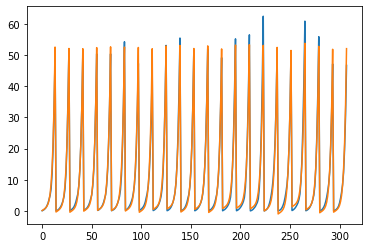

In [ ]:
plt.plot(T)
plt.plot(predict)

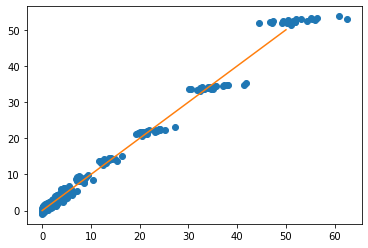

In [ ]:
plt.plot(T, predict, 'o')
plt.plot([0, 50], [0, 50])

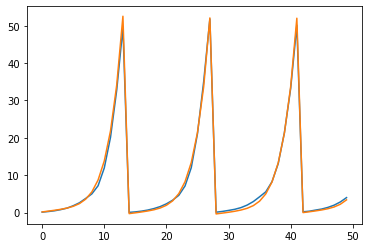

In [ ]:
# let's zoom in on the first 50 samples
n = 50
plt.plot(T[:n])
plt.plot(predict[:n])

Maybe higher powers would work better.  Let's visualize how our model does in terms of RMSE vs. exponent of X.

In [ ]:
result = []
for deg in range(1, 20):
    Xf = X # .copy()
    for d in range(2, deg+1):
        Xf = np.hstack((Xf, X**d))
    err = rmse(use(train(Xf, T), Xf), T)
    #print(deg, Xf.shape)
    result.append([deg,err])
result = np.array(result)
result

array([[ 1.        ,  8.85720884],
       [ 2.        ,  4.08386993],
       [ 3.        ,  1.82254966],
       [ 4.        ,  1.43492952],
       [ 5.        ,  1.43492932],
       [ 6.        ,  1.41844046],
       [ 7.        ,  1.41571184],
       [ 8.        ,  1.41585891],
       [ 9.        ,  1.41534202],
       [10.        ,  1.4152596 ],
       [11.        ,  1.41518172],
       [12.        ,  1.41511394],
       [13.        ,  1.41495994],
       [14.        ,  1.41496023],
       [15.        ,  1.41496212],
       [16.        ,  1.41496388],
       [17.        ,  1.41496521],
       [18.        ,  1.41496602],
       [19.        ,  1.41496633]])

Seems to bottom out around 13 and more or less stay there...

Text(0, 0.5, 'RMSE')

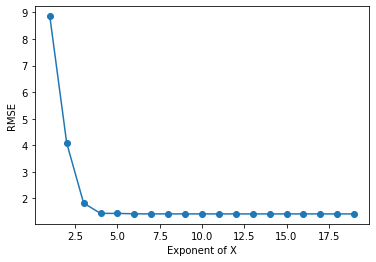

In [ ]:
plt.plot(result[:,0],result[:,1],'o-')
plt.xlabel('Exponent of X')
plt.ylabel('RMSE')

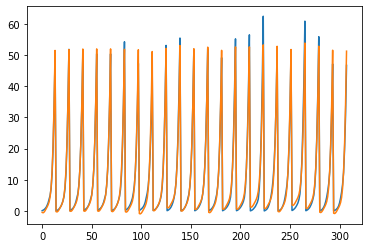

In [ ]:
Xf = np.hstack([X, X**2, X**4, X**8, X**13, X**16])
predict = use(train(Xf, T), Xf)

plt.plot(T)
plt.plot(predict)

In [ ]:
predict

array([[-5.31988278e-01],
       [-4.77172847e-01],
       [-2.43365876e-01],
       [ 1.33106054e-01],
       [ 6.23426363e-01],
       [ 1.22126377e+00],
       [ 1.97070903e+00],
       [ 3.01522562e+00],
       [ 4.67509414e+00],
       [ 7.55040716e+00],
       [ 1.26118665e+01],
       [ 2.11551236e+01],
       [ 3.43083570e+01],
       [ 5.14179477e+01],
       [-2.68416846e-01],
       [-2.13601414e-01],
       [ 2.02055568e-02],
       [ 3.96677486e-01],
       [ 8.86997795e-01],
       [ 1.48483520e+00],
       [ 2.23428047e+00],
       [ 3.27879705e+00],
       [ 4.93866557e+00],
       [ 7.81397860e+00],
       [ 1.28754380e+01],
       [ 2.14186950e+01],
       [ 3.45719284e+01],
       [ 5.16815191e+01],
       [-7.69882756e-02],
       [-2.21728439e-02],
       [ 2.11634127e-01],
       [ 5.88106056e-01],
       [ 1.07842637e+00],
       [ 1.67626377e+00],
       [ 2.42570904e+00],
       [ 3.47022562e+00],
       [ 5.13009414e+00],
       [ 8.00540717e+00],
       [ 1.3

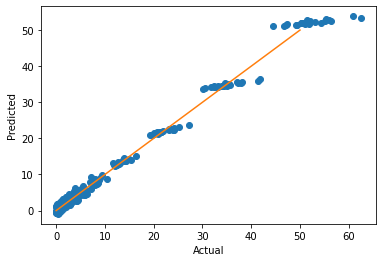

In [ ]:
plt.plot(T, predict, 'o')
plt.plot([0, 50], [0, 50])
plt.xlabel('Actual')
plt.ylabel('Predicted');

## What is a Froude number anyway?

In continuum mechanics, the Froude number ($Fr$) is a dimensionless number defined as the ratio of the flow inertia to the external field.

In naval architecture **the Froude number is a significant figure used to determine the resistance of a partially submerged object moving through water.**

### What's the relationship between Froude number and resistance?

*  Â¯\\_(ãƒ„)_/Â¯
* We don't know (I mean, someone does, go read this paper if you really want to find out: https://www.researchgate.net/publication/283051466_Drag_reduction_of_NPL_round_bilge_hull_forms_in_HYSUCAT_configuration_An_Analytical_Study).
* *We* don't know.

**But** we empirically discovered a relationship between Froude number and resistance on some sample data, and we did it with machine learning!